# U.S. Medical Insurance Costs

## Introduction

What determines the amount of medical insurance charges, according to this data set, an individual has to pay?

Are insurance charges stirctly based on "obvious" factors like, smoking or person's BMI. In this analysis we are giong to figure out just that!

This data set contains data about medical insurance charges from 1338 individuals, along some details like age, sex, region, number of children and whether the person is smoking or not. It has been provided by CodeCademy as a case study for the Data Science Foundations Program.

## Data Wrangling

First, we will load in the data set and get a general overview about all the variables and structure of the data. Any duplicates, missing or inconsistent data?

In [2]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import style
%matplotlib inline
import seaborn as sns
import scipy.stats
import pylab as pab
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

### Import dataset and visualize. ###

df = pd.read_csv(r"C:\Users\stefa\Desktop\Data Science Projects\US Medical Insurance\insurance.csv")

# General overview; missing, or inconsistent data?

print(df.head(1338))

sample_size = print(len(df))

print(df.describe().T)

print(df.dtypes)

df.info()

df.duplicated().sum()

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
1338
           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi 

1

Fortunately enough, the data set seems to be clean! No missing, duplicated or inconsistent data. Though, if we had duplicates, especially if there weren't many, deleting them would be unwise. Since there might be a small propability, that two different individuals have the same age, sex, number of children and even insurance charges.

## Exploratory Data Analysis

Let's get an insight into how many men and women are respresented in the data set and how many of them smoke.

male      0.5052
female    0.4948
Name: sex, dtype: float64
Men: 676
Women: 662
39.4


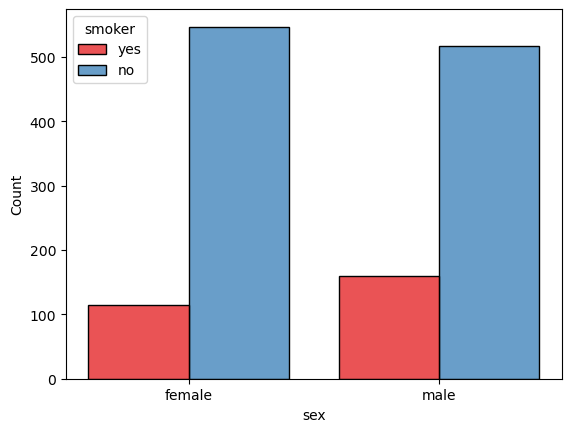

In [15]:
# Overview of the genders.

gender = df.get("sex").value_counts()
gender_percentage = round(gender/sum(gender), 4)

print(gender_percentage)
# Calculating the amount of smokers for each gender.

num_smokers = df.get("smoker").value_counts()
smoker_percentage = round(num_smokers/sum(num_smokers), 4)
agg_smokers = (df.groupby("smoker")[["sex"]]).value_counts()

smokers = df[["sex", "smoker"]]
male_smokers = smokers[smokers["sex"] == "male"]
female_smokers = smokers[smokers["sex"] == "female"]

print("Men: " + str(male_smokers.value_counts().sum()))
print("Women: " + str(female_smokers.value_counts().sum()))

# Visualize amount of smokers in a Bar-Chart

sns.histplot(data = df, x = "sex", hue = "smoker", 
    shrink = 0.8, 
    palette = "Set1",
    discrete = True,
    multiple= "dodge"
)

# What is the mean age of all the smokers and non smokers; men and women?

df_age_smoker = df[["age", "smoker"]]
age_smokers = df_age_smoker[df_age_smoker["smoker"] == "yes"]
age_non_smokers = df_age_smoker[df_age_smoker["smoker"] == "no"]

mean_age_smokers = round(np.mean(age_smokers.age), 1)
mean_age_non_smokers = round(np.mean(age_non_smokers.age), 1)

# Is there a significant difference in age between smokers an non smokers?

mean_diff_age_smokers = round(abs(mean_age_non_smokers - mean_age_smokers), 1)
print(mean_age_non_smokers)

Interesting, the amount of men and women are roughly the same. With 50.52% (676)being men and 49.48% (662) being women.

Smokers are on average approximately 38.5 years old, where non smokers are 39.4 years old. Thus, non smokers are, on average around 11 months older! This difference isn't really significant, but nice to know!

There are, though, more male smokers than female.

### How is the sample size distributed across the regions?

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='Count'>

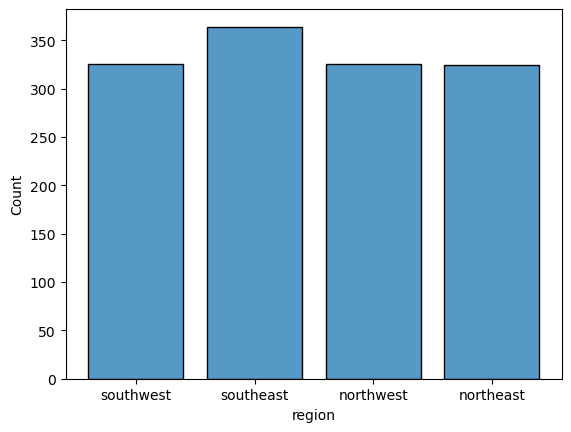

In [172]:
## How is the population distributed across the regions?

pop_distribution = df.region.value_counts()
print(pop_distribution)

plt.clf()
sns.histplot(df.region, 
             shrink = 0.8
            )

The distribution seems to be quite even. With only the "southeastern" region having a slightly higher population.

### How is age distributed? How is age distributed across the regions we just inspected? 

            age
region         
northeast  39.5
northwest  39.0
southeast  39.0
southwest  39.0


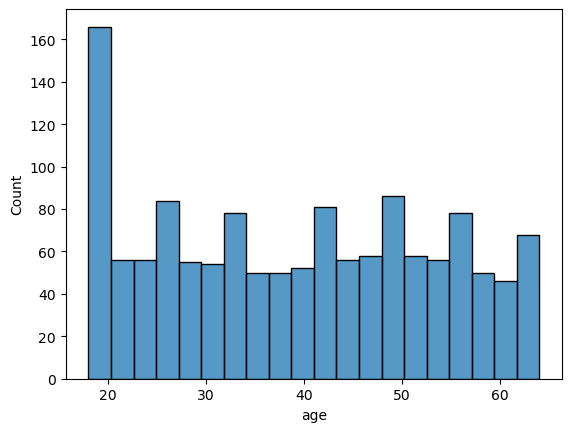

16.59% of individuals are between 18 and 22 years old!


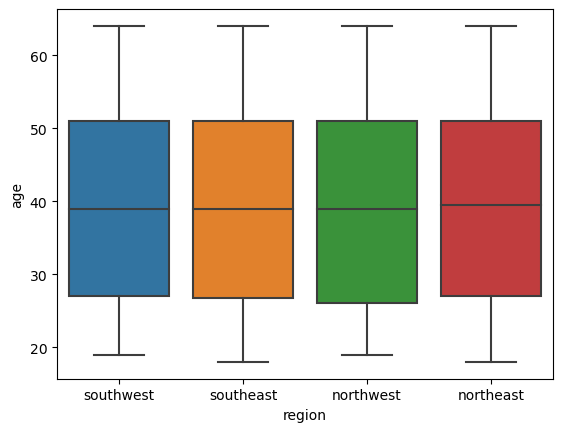

In [52]:
### How is age distributed across the regions? What is the age span of the individuals? ###

max_age = df.age.max()
min_age = df.age.min()
mean_age = np.mean(df.age)
age_span = max_age - min_age
age_NE = df.groupby("region")[["age"]].median()

print(age_NE)

# Plot the age distribution

plt.clf()
sns.histplot(df.age, bins = 20)
plt.show()

plt.clf()
sns.boxplot(df.region, df.age)

# Count the indivuals with aged from 18 to 22 years. What is the proportion in relation to the dataset?

ages_18_22 = []

for age in df.age:
    if age in range(18, 23):
        ages_18_22.append(age)  
        
print(str(round(len(ages_18_22) / len(df) * 100, 2)) + "% of individuals are between 18 and 22 years old!")        

Age seems to be distributed quite evenly. But, there are more observations around 20 years old compared to older age-groups. Around 17% of individuals are from 18 to 22 years old.

Age is distributed evenly. The mean age for the all the regions, ranges from 38 to 39 years. Though the median age for the northeastern region is marginably higher compared to the other regions at 39.5 years.

### How is BMI distributed across the different regions? Any noteable differences?

bmi    30.596615
dtype: float64


<AxesSubplot:xlabel='region', ylabel='bmi'>

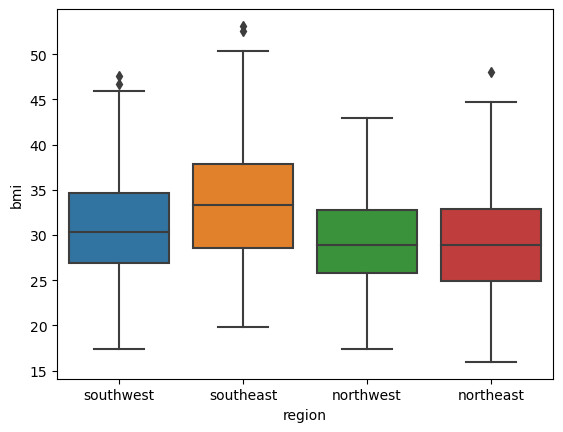

In [71]:
### How is BMI distributed across the regions? Which region has the highest mean BMI? ###

bmi_region = df[["region", "bmi"]]

sw = bmi_region[bmi_region["region"] == "southwest"]
se = bmi_region[bmi_region["region"] == "southeast"]
nw = bmi_region[bmi_region["region"] == "northwest"]
ne = bmi_region[bmi_region["region"] == "northeast"]

# Define a function for quick access to region-based BMI

def get_mean_region_bmi(region):
    
    mean_region_bmi = np.mean(region)

    return print(mean_region_bmi)


get_mean_region_bmi(sw)

# Boxplots illustrating BMI distribution across regions further

plt.clf()
sns.boxplot(df.region, df.bmi)

The southeastern region is a bit of an outlier, with an average and median BMI of approximately 33 and 34 respectively. The other regions' BMIs reange from around 29 to 30.

### Taking a closer look at the relation between age and BMI.

<Figure size 640x480 with 0 Axes>

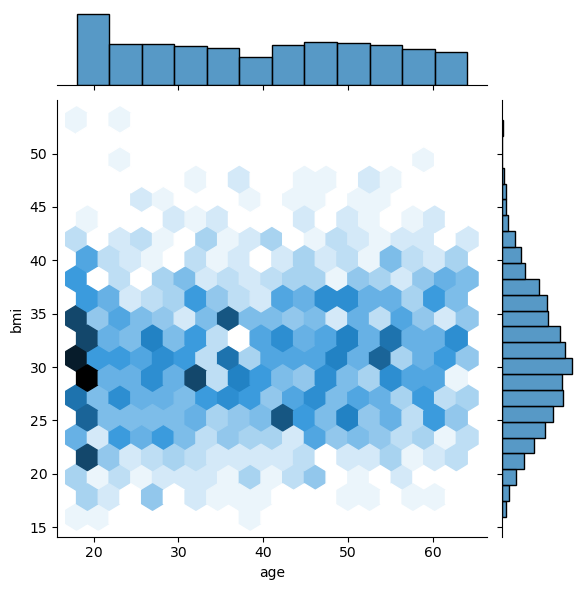

53.13 15.96 30.663396860986538 30.4


<Figure size 640x480 with 0 Axes>

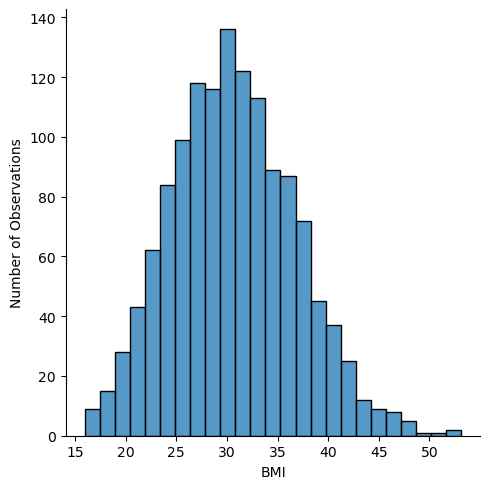

In [6]:
### How are age and BMI related; how are observations of BMI distributed across age? ###

plt.clf()
sns.jointplot(df.age, 
              df.bmi, 
              kind = "hex"
              )
plt.show()

# Distribution of BMI
plt.clf()
distplot_bmi = sns.displot(df.bmi)
distplot_bmi.set(xlabel = "BMI", ylabel = "Number of Observations")

max_bmi = np.max(df.bmi)
min_bmi = np.min(df.bmi)
mean_bmi = np.mean(df.bmi)
median_bmi = np.median(df.bmi)

print(max_bmi, min_bmi, mean_bmi, median_bmi)  

We can see that BMI is normally distributed at around 30, where age clearly isn't, as we have discussed previously. The heatmap illustrates that there are alot of age-bmi combinations, where individuals are around 20 years old with a BMI of 27 to 34. This makes sense, since we have discovered that there are an unusual amount of observations with individuals aged from 18 to 22 years. 

Furthermore the maximum BMI recorded is at around 53 and the minimum at 16. Both the median and mean BMI are at around 30.5, close to the peak of the distribution.

It is safe to say, that there isn't a particular group of age with a significantly different BMI.

### General overview of the insurance charges

<Figure size 640x480 with 0 Axes>

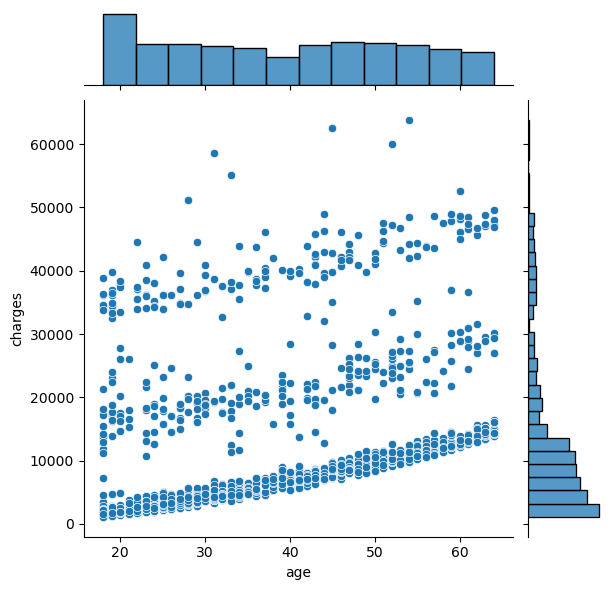

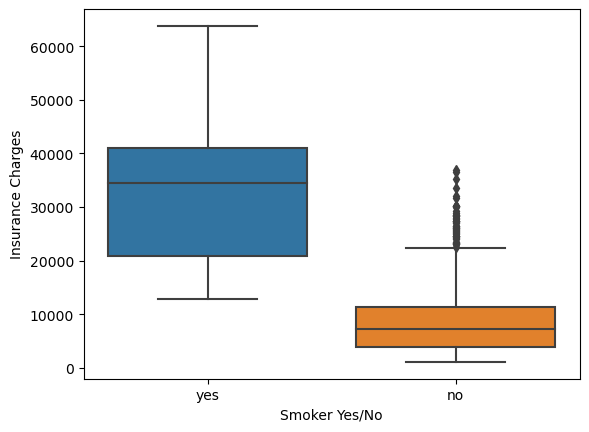

     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801
63770.42801


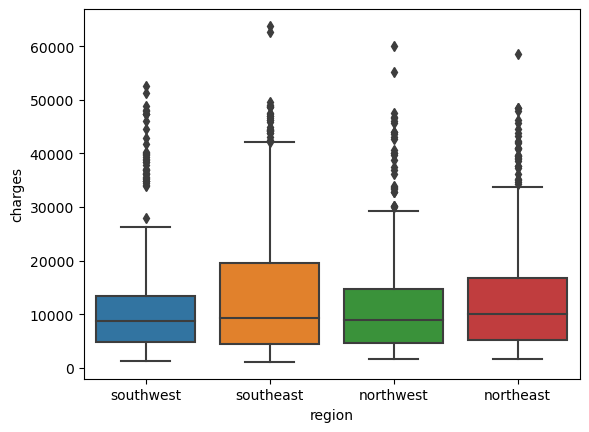

In [17]:
### Charges - general descriptive overview, distribution(s) across age, bmi, region and smokers ###

# Plot distribution of charges 
plt.clf()
plt.hist(df.charges, bins = 30)

# Jointplot of age and charges
plt.clf()
sns.jointplot(df.age, df.charges)
plt.show()

# Difference in distribution of insurance charges conditional on smokers
plt.clf()
boxplot = sns.boxplot(df.smoker, df.charges)
boxplot.set(xlabel = "Smoker Yes/No", ylabel = "Insurance Charges")
plt.show()

# Distribution of insurance charges across regions

sns.boxplot(df.region, df.charges)

# Mean, min and max values of recorded charges
mean_charges = np.mean(df.charges)
min_charges = df.charges.min()
max_charges = df.charges.max()

# The individuals with the min and max charges
person_min_charges = df[df["charges"] == min_charges]
person_max_charges = df[df["charges"] == max_charges]

age_bmi_charges = df[["age", "bmi", "charges"]]

print(person_max_charges)
print(max_charges)

The insurance charges are heavily skewed to the right, with a mean value of approximately $13270.42.

Taking a look at the joint plot, there is a clear correlation between the age and the insurance charges payed by each individual. Also the correlation does not seem to be linear, since the insurance charges increase disproportinately with increasing age. This propably has to do with the fact that the older we get, on average, the more we visit the doctor in order to get medical conditions treated. If we take a look at the joint plot between age and charges, the observations are denser between insurance charges of around $2000 to approximately $14000. This is logical, because the most insurance charges recorded in this data set lie in between that intervall. (Note the skewed distribution of charges).

Additonally, there seem to be different charges recorded for any given age. For example, there are individuals aged 40 years who pay $5000 to $7000 but also $18000 to $22000 and around $39000 as well. Meaning that there must be other factors determining insurance charges besides age.

How about smoking? Smoking is a major health concearn and should drive insurance charges up. Is that the case? Mainly, yes, but there still alot of individuals who pay high amounts without smoking regardless. In this case the  BMI of a given individual could be a good estimator the insurance charges that individual has to pay. 

### Closer look at the relationship between charges, age and BMI

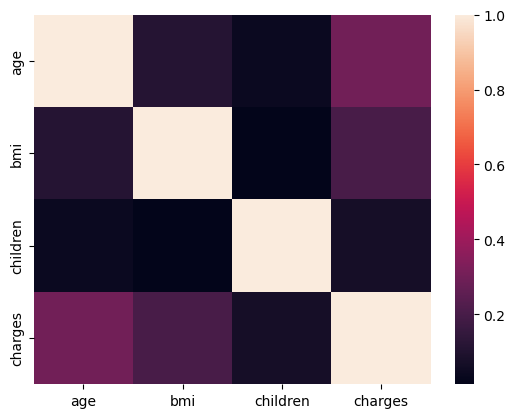

In [176]:
### Correlation-Matrix - Correlations between given variables except "smoker" and "region" ###

plt.clf()
sns.heatmap(df.corr("pearson"))
plt.show()

We know that smoking has a major impact on insurance charges, thus we try to find other factors determining the amount of insurance charges an individual has to pay.

For that matter we construct a correlation-matrix, cleanly depicting the relationsships between variables we are interested in.

Now it becomes clear that, compared to the other variables, the correlation between insurance charges, age and BMI respectively is the strongest.

### Linear Regression

In [20]:
### Run a (linear) regression with the dependend variable being "charges" ###

# Preparing DataFrame for regression; converting strings to actual dummies (0, 1) and dropping the column "region".

reg_df = df.drop(columns = ["region"]) 
reg_df = pd.get_dummies(reg_df, columns = ["sex", "smoker"], drop_first = True)

# Regress charges on X ε {age, sex, bmi, smoker, children}

pred_charges = sm.OLS.from_formula("charges ~ age + sex_male + bmi + smoker_yes + children", reg_df).fit()
params = pred_charges.params
pred_charges.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:28:03   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.205e+04    951.260    -12.670      0.000   -1.39e+04   -1.02e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
sex_male    -128.6399    333.361     -0.386      0.700    -782.609     525.329
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
smoker_yes  2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
children     474.4111    137.856      3.441      0.001     203.973     744.849
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After running the regression on insurance charges with all variables except region, we yield some intersting results. First off, we are dropping the "region" variable since the distribution of insurance charges across regions is even. Meaning there is no region where extremely high or low insurance charges are to be expected.

Our main variables of focus in this regression are age, BMI, whether the person is smoking and interestigly the number of children. The gender ("sex_male") does not seem to be statistically significant with a high p-value of 0.7 and a low t-statistic of 0.386. This means that the impact of the gender on insurance charges is **not** significantly different from 0. When we ommit the gender dummy from our regression, the R-squared does not drop and stays at 0.750! 

It is safe to say though that the other variables included in the regression have a high explanatory value for the expected insurance charges. The age, BMI and our dummy for smokers yield a very high and robust t-statistic and extremely low p-values converging towards 0.

Our model, whether we include the gender or not, explains the variation in insurance charges fairly well with an R-squared of 0.750. This means that around 75% of the variation in observed insurance charges is described by the age, BMI, smoking and number of children.

### Joint significance of BMI and smoking - Two factors which should have an effect on the insurance charges.

In [107]:
### Regress charges on X ε {age, sex, bmi * smoker, children} ###

# Generate interaction-term between "bmi" and "smoker_yes" and run regression on given variables

charges_pred_interact = sm.OLS.from_formula('charges ~ age + sex_male + children + bmi:smoker_yes', reg_df).fit()
charges_pred_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1476.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:48:13   Log-Likelihood:                -13346.
No. Observations:                1338   AIC:                         2.670e+04
Df Residuals:                    1333   BIC:                         2.673e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2769.0557    466.182     -5.940      0.000   -3683.586   -1854.526
age              269.1680     10.145     26.532      0.000     249.266     289.070
sex_male        -313.4391    285.853     -1.097      0.273    -874.209     247.331
children         498.6244    118.216      4.218      0.000     266.714     730.534
bmi:smoker_yes   810.7729     11.237     72.155      0.000     788.729     832.816
==============================================================================
Omnibus:                      549.953   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2488.281
Skew:                           1.929   Prob(JB):                         0.00
Kurtosis:                       8.455   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we constructed an interaction-term between the persons BMI and if he or she is smoking or not.

The interaction-term yields an extremely high t-statistic of 72 and, once again, a p-value close to zero. This confirms what we have expected earlier.

The individual's age is still highly significant with an increased t-statistic of roughly 26.5, additionally the significance of the number of children has risen slightly. The p-value has decreased further and the t-statistic has increased to 4.218, compare to 3.441 in the previous regression.

The significance of the genders coefficient has changed slightly as well. But still, with a given p-value of 0.273 and a low t-statistic of approximately 1.1, the propability that the coefficient is statistically different from zero is rejected on most levels of significance.

The R-squared has increased further to 0.816 from 0.750 in the previous regression.

### Predicting insurance charges for a given individual

In [22]:
### Predict the expected insurance charges for a given individual ###

# Create a dictionary with all variables and corresponding coefficients estimated in the previous regression

coef_labeled = {"intercept": params[0], 
                "age": params[1], 
                "sex_male": params[2], 
                "bmi": params[3], 
                "smoker_yes": params[4], 
                "children": params[5]
                }

print(coef_labeled)

# Define a function estimating the annual insurance costs for a given individual

def pred_insurance(age, sex_male, bmi, smoker_yes, children):

    # Define the domain for our dummies, sex_male and smoker_yes

    domain_dummy = (0, 1)

    # Check if the given arguments are part of the domain; if so, run the regression

    if (sex_male in domain_dummy) and (smoker_yes in domain_dummy):

        expected_charges = coef_labeled.get("intercept") + \
                           coef_labeled.get("age") * age + \
                           coef_labeled.get("sex_male") * sex_male + \
                           coef_labeled.get("bmi") * bmi + \
                           coef_labeled.get("smoker_yes") * smoker_yes + \
                           coef_labeled.get("children") * children
        
        return print("Estimated insurance charges for given individual are: $" + str(round(expected_charges, 2)))
    
    else:

        raise ValueError("Given values for dummy variables not in domain!")

pred_insurance(60, 0, 41, 0, 4)          

{'intercept': -12052.4619856647, 'age': 257.73498766924524, 'sex_male': -128.63985356969772, 'bmi': 322.3642144860735, 'smoker_yes': 23823.392530652607, 'children': 474.41112061268547}
Estimated insurance charges for given individual are: $18526.21


In this cell we defined a function for predicting the expected insurance costs for a random individual with the variables and corresponding coefficients from our first regression.

For example, for a woman, 60 years old who does not smoke and has 4 children the expected insurance charges to be payed by her annualy are $18526.21. If she was smoking, the would be paying $42349.61 instead!

### Distinguishing insurance charges between smokers and non smokers

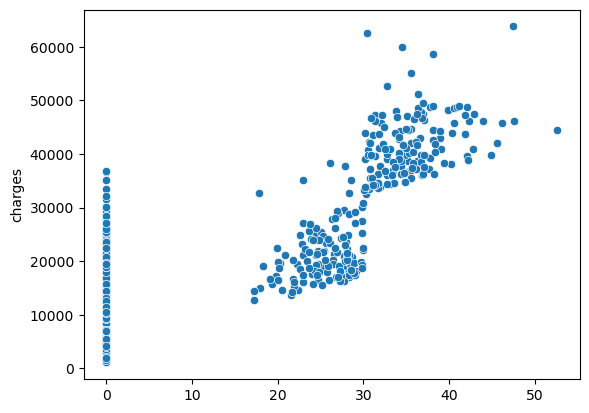

In [24]:
### Scatterplot of charges and bmi * smoker ###

plt.clf()
sns.scatterplot(reg_df.bmi * reg_df.smoker_yes, reg_df.charges)
plt.show()

In this case it becomes clear that there is an correlation between BMI and insurance charges while seperating smokers from non smokers. As we have learned before, non smokers, on average, pay considerably lower insurance charges than smokers. The scatterplot though suggests otherwise, there alot of observations of non smokers who pay high insurance charges. 

Also, when we inspect the correlation between BMI conditional on smokers with insurance charges, we once again see that the variance changes with increasing BMI of people who smoke.

### Visualizing insurance charges greater than $20000 of individuals who do **not** smoke

39.20702541106129
30.714098360655726
age              64.00000
bmi              41.91000
children          4.00000
charges       36910.60803
sex_male          1.00000
smoker_yes        0.00000
dtype: float64


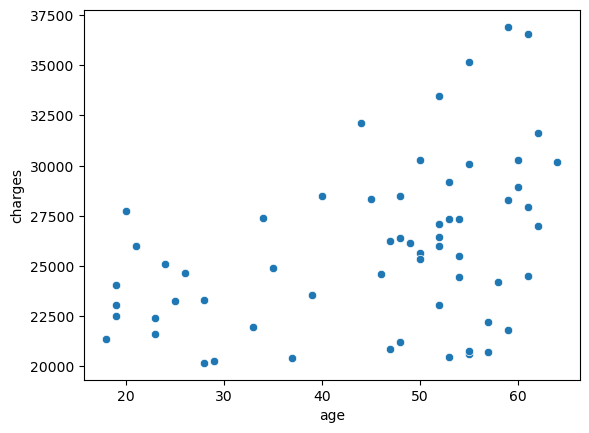

<AxesSubplot:>

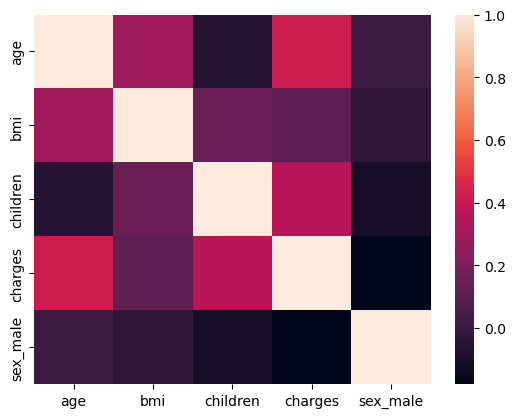

In [27]:
### Alot of non smoking individuals seem pay high insurance charges regardless, why? ###

# Create DataFrame with all non smoking individuals and charges above $20000
non_smokers_charges = reg_df[reg_df.smoker_yes == 0]
charges_greater_20000 = reg_df[reg_df.charges >= 20000]

df_charges = non_smokers_charges.merge(charges_greater_20000, how = "left")

highest_charges = df_charges[df_charges.charges >= 20000]

# Mean age across highest_charges
mean_age_among_highest_charges = np.mean(highest_charges.age)
mean_age_df = np.mean(df.age)
print(mean_age_df)

# Mean BMI across highest charges
mean_bmi_highest_charges = np.mean(highest_charges.bmi)
print(mean_bmi_highest_charges)

# The non smoking person with the highest charges recorded - let's call him "Peter"
Peter = highest_charges.max()
print(Peter)

# Correlation between charges and number of children
plt.clf()
sns.boxplot(highest_charges.children, highest_charges.charges)

# Correlation between charges and age
plt.clf()
sns.scatterplot(highest_charges.age, highest_charges.charges)
plt.show()

# Correlation-Matrix
sns.heatmap(highest_charges.drop(columns = ["smoker_yes"]).corr("pearson"))


Let us take a closer look at the people who pay high amounts of insurance who do no smoke. Peter, for example, is 64 years old has an BMI of 41, doesn't smoke and has four children; he pays roughly $36910 in insurance every year. Why?

When we plot the various combinations of insurance charges and age, we see that there is in fact positve trend, as we have discovered for rest of the data set previously. We saw that the variance in insurance charges with increasing age remained constant, though in this case the variance seems to increase when the age increases. This means that we are dealing with heteroskedasticity.

Once again constructing the correlation-matrix, it seems like the correlation between charges and age has become stronger compared to the previous case. Furthermore, the number of children now appears to be more relevant with a correlation-coefficient of ~0.3. Interestingly enough, the effect of BMI on charges has dropped to a lower correlation-coefficient; something I certainly did not expect.

### Fitting a regression model to the subset of observations with the highest amount of insurance charges who do not smoke

In [29]:
### Run a regression on the non smoking individuals with the highest charges recorded ###

# Preparing the DataFrame by "dropping" the smokers (none of the individuals in this DataFrame are smoking)
reg_highest_charges = highest_charges.drop(columns = ["smoker_yes"])

# Running the regression on charges with X ε {age, bmi, children, sex_male}
model = sm.OLS.from_formula("charges ~ age + bmi + children + sex_male", data = reg_highest_charges).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     7.301
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           8.35e-05
Time:                        15:24:00   Log-Likelihood:                -580.34
No. Observations:                  61   AIC:                             1171.
Df Residuals:                      56   BIC:                             1181.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.053e+04   2717.987      7.552      0.000    1.51e+04     2.6e+04
age          133.3863     32.980      4.044      0.000      67.319     199.453
bmi          -57.4515     86.862     -0.661      0.511    -231.458     116.555
children    1391.1590    405.555      3.430      0.001     578.735    2203.583
sex_male   -1144.5632    882.293     -1.297      0.200   -2912.009     622.883
==============================================================================
Omnibus:                        0.716   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.279
Skew:                           0.139   Prob(JB):                        0.870
Kurtosis:                       3.182   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Age remains an robust estimator for insurance charges with high t-statistic and low p-value, so does the number of children. What is unusual, however, and indeed seems contradictory, is that the BMI of a person does **not** have a significant impact on insurance charges anymore. The gender on the other hand has gained a slightly higher t-statistic but is still on the verge of insignificance regarding this data set.

We have to keep in mind that this subset is only a sample size of 61 observation and thus can be seen as an outlier in the entire data set of 1338 observations.

There must be other factors which lead to exceptionally high insurance charges, considering someone does not smoke.

### Interactive 3D scatterplot for age, number of children and charges as the dependent variable

In [181]:
### Make an interactive 3D scatterplot ###

fig = px.scatter_3d(highest_charges, x = "age", y = "children", z = "charges",
                    size = "charges",
                    size_max = 13,
                    color = "charges"
                    )
fig.show()

## Conclusion

When we inspect the entire data set, the models suggest that the best estimators for medical insurance charges are the age, BMI, whether the person is smoking or not and the number of children an individual has. However, the higher the insurance charges become, the harder it is to draw conclusions on the population from this sample. As we have seen there is more "noise" (variance) in the observations with higher insurance charges especially when we account for individuals with high insurance charges who do not smoke. This leads to the conclusion that there must be ommited variables not included in this data set that might explain the amount of insurance charges better.

### Limitations of the data set

+ The data set itself is quite small, a sample size of only 1338 is not representative enough in order to make draw causal conclussions to the population.

+ The data set seems to be almost "hand picked". Alot of the distributions illustrated in the analysis would suggest that way. The different regions for example all rougly had the same amount of observations. Relatively speaking there are also alot of young people included in the sample with highlights the lower insurance charges. This might explain why the distribution of insurance charges is skewed heavily to the right. This could induce  bias since the sample might not have been randomly selected.

+ Above all, this data sets source is unknown. Therefore drawing conclusion to the population based on this sample might be unwise. Still, though, it is a fun insight to work with.